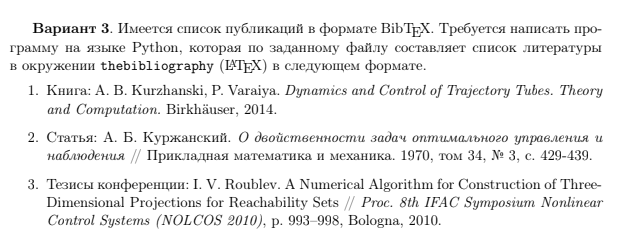



In [1]:
import re

dict_type = {
    'book': 'Книга',
    'article': 'Статья',
    'inproceedings': 'Тезисы конференции'
}

def format_name(full_name):
    full_names = full_name.split('and')
    res = ''
    for full_name in full_names:
        parts = full_name.replace(',',"").split()
        last_name = parts[0].capitalize()
        first_initial = parts[1][0].upper() + '.'
        middle_initial = parts[2][0].upper() + '.' if len(parts) > 2 else ''
        
        res += f"{first_initial} {middle_initial} {last_name}, "
    return res[0:-2]

def generate_bibliography(file_path):    
    bibliography = "\\begin{thebibliography}{99}\n"
    with open(file_path, 'r') as file:
        lines = file.readlines()
    i = 0
    cur_item = 1
    while i < len(lines):
        if lines[i][0] == '@':
            regexp = r'@([^@{]+)\{'
            res = re.findall (regexp , lines[i])
            bib_type = dict_type[res[0]]
        i += 1
        ind = lines[i].find('{')+1
        authors = format_name(lines[i][ind:-3])
        i+=1
        ind = lines[i].find('{')+1
        title = lines[i][ind:-3]
        pattern = re.compile('[а-яА-Я]')
        ru_language = bool(pattern.search(lines[i]))
        i+=1
        
        if bib_type == 'Книга':
            title = '\\textit{' + title + '}'
        elif bib_type == 'Статья':
            ind = lines[i].find('{')+1
            journal = lines[i][ind:-3]
            title = '\\textit{' + title + '} // ' + journal
        else:
            ind = lines[i].find('{')+1
            booktitle = lines[i][ind:-3]
            title = title + '// \\textit{'  + booktitle + '}'
            
        year = ''
        address = ''
        pages = ''
        
        while (len(year) == 0) or (len(address) == 0) or (len(pages) == 0) or (lines[i][0] != '@') or (i<len(lines)):
            if (i==len(lines)) or (lines[i][0] == '@'):
                break
            ind = lines[i].find('{')+1
            if (re.search(r'\s*year\s*=\s*{', lines[i])):
                year = lines[i][ind:-3]
            elif (re.search(r'\s*address\s*=\s*{', lines[i])):
                address =  lines[i][ind:-3]
                ind2 = address.rfind(',')
                if ind2 > -1:
                    address = address[ind2+2:]
            elif (re.search(r'\s* pages\s*=\s*{', lines[i])):
                if ru_language:
                    pages = 'с. '
                else:
                    pages = 'p. '
                pages += lines[i][ind:-3] + ','
            i+=1
            if (year != '') and (address != '') and (pages != ''):
                break 
        while (i<len(lines)) and (lines[i][0] != '@'):
            i+=1
        
            
        bibliography += f"  \\bibitem{{{cur_item}}}{bib_type}: {authors}. {title}. {pages} {address}, {year}.\\par\n\n"
        cur_item += 1
        
        if (cur_item == 20):
            break
    bibliography += "\\end{thebibliography}"
    return bibliography

file_path = "v_3.bib"  
latex_bibliography = generate_bibliography(file_path)

print(latex_bibliography)



\begin{thebibliography}{99}
  \bibitem{1}Книга: A.  Kurzhanski, B.  Er, A.  Daryin, N.  Er. \textit{Dynamic Programming for Impulse Feedback and Fast Controls}.  United Kingdom, 2019.\par

  \bibitem{2}Книга: A. B. Kurzhanski, P.  Varaiya. \textit{Dynamics and Control of Trajectory Tubes. Theory and Computation}.  Birkh{\"a}user, 2014.\par

  \bibitem{3}Книга: A. B. Kurzhanski, I.  Valyi. \textit{Ellipsoidal Calculus for Estimation and Control}.  Birkh{\"a}user Basel, 1994.\par

  \bibitem{4}Книга: А. Б. Куржанский. \textit{Управление и наблюдение в условиях неопределенности}.  Наука Москва, 1977.\par

  \bibitem{5}Тезисы конференции: А. Б. Куржанский, А. А. Усова. Приложение теории группового управления к робототехническим системам// \textit{Теория оптимального управления и приложения (OCTA 2022): материалы Международной конференции, (Екатеринбург, 27 июня – 1 июля 2022 г.); — Екатеринбург : ИММ УрО РАН}. с. 131--136, Екатеринбург, 2022.\par

  \bibitem{6}Тезисы конференции: А. Б. Кур